<a href="https://colab.research.google.com/github/Shreyaprashanth/Samsung__Innovation__Campus/blob/main/health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

In [10]:
import kagglehub
import pandas as pd
import os
###############################################################
# Specify the dataset identifier (user/dataset-name) and the file within the dataset
dataset_owner = "himanshunakrani"
dataset_name = "naive-bayes-classification-data"
dataset_handle = f"{dataset_owner}/{dataset_name}"
###############################################################
# Download the dataset to a local directory
local_path = kagglehub.dataset_download(dataset_handle)
###############################################################
# List the contents of the downloaded directory to find the correct file path
print(f"Dataset downloaded to: {local_path}")
###############################################################
print("Contents of the dataset:")
###############################################################
for root, dirs, files in os.walk(local_path):
    level = root.replace(local_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')
###############################################################
# Once you find the correct file path, replace "crime_statistics.csv"
# with the correct path and uncomment the line below to load the data into a DataFrame.
file_path_within_dataset = "Naive-Bayes-Classification-Data.csv"
###############################################################
df = pd.read_csv(os.path.join(local_path, file_path_within_dataset))
###############################################################
# display(df.head())
df.head()

100%|██████████| 2.02k/2.02k [00:00<00:00, 2.44MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/himanshunakrani/naive-bayes-classification-data/versions/1
Contents of the dataset:
1/
    Naive-Bayes-Classification-Data.csv


,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


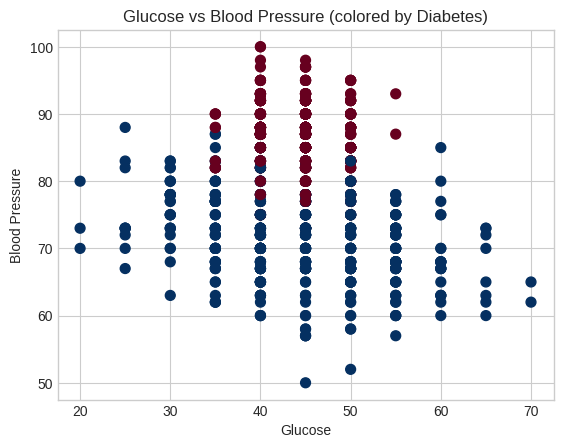

In [14]:
# Assuming 'df' is the DataFrame loaded from 'Naive-Bayes-Classification-Data.csv'
# Extract features and target similar to the make_blobs example
X, y = df[['glucose', 'bloodpressure']].values, df['diabetes'].values

# Create the scatter plot similar to the make_blobs example
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Glucose vs Blood Pressure (colored by Diabetes)')
plt.show()

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [16]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

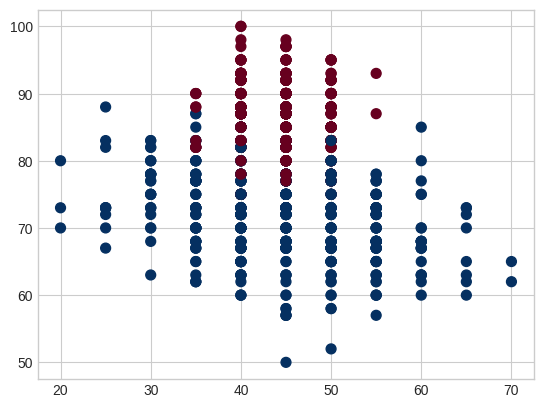

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [18]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [19]:
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [20]:
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV

    # Define the parameter grid
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

    # Create a Gaussian Naive Bayes classifier
    model = GaussianNB()

    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Get the best parameter and best score
    print(f"Best var_smoothing: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")

Best var_smoothing: {'var_smoothing': 1e-09}
Best score: 0.9326633165829147
